

# Project 2: Movies Database 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


>
> In this project, I'm selecting the movies dataset. The reason for selecting this dataset is that I'm very interested in this subject (movies), I'm also familiar with the attributes of this dataset.
>Before starting with my questions, let me first address the project specification (criteria):
>
> 1- Does the code work?
> yes, all parts of this code are working.
>
> 2- Does the project use NumPy and Pandas appropriately?
> yes, in this project, I used a lot of pandas and NumPy's functions.
>
> 3- Does the project use good coding practices?
> Hopefully. I tried my best and I also used a lot of other resources.
>
> 4- Is a question clearly posed?
> You will see the questions later in this section.
>
> 5- Is the data cleaning well documented?
> This is covered in the data wrangling section.
>
> 6- Is the data explored in many ways?
> This is covered in the exploratory data analysis section.
>
> 7- Are there a variety of relevant visualizations and statistical summaries?
> This is covered in the exploratory data analysis section.
>
> 8- Has the student correctly communicated tentativeness of findings?
> This is covered in both the exploratory data analysis section and the Conclusions section.
>
> 9- Is the flow of the analysis easy to follow?
> with the comments for every step, I think it is easy to follow.
>
> 10- Is the data visualized using appropriate plots and parameter choices?
> Hopefully.
>
>
> Now here are my questions:
> 1- Which genre cost the most and which genre made the most revenue?
>
> 2- Is there any relation between the revenue and the release year?
>
> 3- Is there any relation between the genre and the vote average?
>
> There will also be a lot of other questions that we'll answer during the exploratory data analysis step.




In [1]:
import pandas as pd
from pandas import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the dataset file

movies = pd.read_csv('tmdb-movies.csv')
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# checking the data type of each attribute

movies.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [4]:
# Number of columns and rows in this dataset

movies.shape

(10866, 21)

In [5]:
# Information about the dataset such as mean, median and standard deviation

movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
# checking the number of rows for each column

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

<a id='wrangling'></a>
## Data Wrangling



### General Properties

### Data Cleaning 
> The first step we are going to do is getting rid of the unwanted data, and by unwanted I mean the data that I don't need in my analysis.

In [7]:
# remove the data we are not going to use

movies.drop(['id','imdb_id','homepage','tagline','keywords','overview','release_date'], axis=1, inplace=True)
movies.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [8]:
# checking the number of rows for each column

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


> As we can see, the production_companies column is missing some data, and we need to balance the data for every column

In [9]:
# drop the incomplete rows, to have a better result.

movies.dropna(inplace = True)
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9773 entries, 0 to 10865
Data columns (total 14 columns):
popularity              9773 non-null float64
budget                  9773 non-null int64
revenue                 9773 non-null int64
original_title          9773 non-null object
cast                    9773 non-null object
director                9773 non-null object
runtime                 9773 non-null int64
genres                  9773 non-null object
production_companies    9773 non-null object
vote_count              9773 non-null int64
vote_average            9773 non-null float64
release_year            9773 non-null int64
budget_adj              9773 non-null float64
revenue_adj             9773 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.1+ MB


> Now we'll create a new data frame, this data frame will be similar to the original one for now.
>
> The reason of this step is that we are going to play with the new data frame. But we'll keep the original one in case we need it.

In [10]:
# creat a new data frame.

NewMoveisDataFrame = movies[['popularity','budget','revenue', 'original_title','cast','director','runtime', 'genres','production_companies','vote_count','vote_average','release_year','budget_adj','revenue_adj']]

# check the new data frame.

NewMoveisDataFrame.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


> Now as we can see in our data frame, the cast, genres, and production_companies columns contained multiple values. This will make those values unique, even though a lot of them are not. Which will make the analysis harder for us.
>
> To solve this problem we need to split those values.
>
> To do this step, I used some resources form the internet. Those were my resources:
>
> https://stackoverflow.com/questions/45965128/duplicating-pandas-dataframe-rows-based-on-string-split-without-iteration
>
> https://stackoverflow.com/questions/50858129/delimit-split-row-values-and-form-individual-rows
>
> https://stackoverflow.com/questions/44080909/how-to-make-each-row-in-dataframe-have-one-value-for-each-column
>

In [11]:
# here we are spliting Genres
# NewMoveisDataFrame is the new data frame I created previously
# Spliting is the attrebute I'm using to split after evrey ('|')
# NewMoveisDataFrameSplitGenres is a new data frame with the split genre

spliting = NewMoveisDataFrame['genres'].str.split('|').apply(Series, 1).stack()
spliting.index = spliting.index.droplevel(-1)
spliting.name = 'genres'
del NewMoveisDataFrame['genres']
NewMoveisDataFrameSplitGenres = NewMoveisDataFrame.join(spliting)


In [12]:
# here we are spliting Cast
# Spliting2 is the attrebute I'm using to split after evrey ('|')
# NewMoveisDataFrameSplitCast is a new data frame with the split cast


spliting2 = NewMoveisDataFrame['cast'].str.split('|').apply(Series, 1).stack()
spliting2.index = spliting2.index.droplevel(-1)
spliting2.name = 'cast'
del NewMoveisDataFrame['cast']
NewMoveisDataFrameSplitCast = NewMoveisDataFrame.join(spliting2)

In [13]:
# here we are spliting Production Companies
# Spliting3 is the attrebute I'm using to split after evrey ('|')
# NewMoveisDataFrameSplitProductionCompanies is a new data frame with the split production companies

spliting3 = NewMoveisDataFrame['production_companies'].str.split('|').apply(Series, 1).stack()
spliting3.index = spliting3.index.droplevel(-1)
spliting3.name = 'production_companies'
del NewMoveisDataFrame['production_companies']
NewMoveisDataFrameSplitProductionCompanies = NewMoveisDataFrame.join(spliting3)


In [14]:
# check the split genre data farme

NewMoveisDataFrameSplitGenres.head()

,popularity,budget,revenue,original_title,cast,director,runtime,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,Action


In [15]:
# check the split cast data farme

NewMoveisDataFrameSplitCast.head()

,popularity,budget,revenue,original_title,director,runtime,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,cast
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Bryce Dallas Howard
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Irrfan Khan
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Vincent D'Onofrio
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Nick Robinson


In [16]:
# check the split production companies data farme

NewMoveisDataFrameSplitProductionCompanies.head()

,popularity,budget,revenue,original_title,director,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,production_companies
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Universal Studios
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Amblin Entertainment
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Legendary Pictures
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Fuji Television Network
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Dentsu


<a id='eda'></a>
## Exploratory Data Analysis

> Now before we answered our questions, let's do some general investigation to our dataset.
>
> Note that each one of our investigated attributes will have a comment under it. The comment contains a description of the investigation and results if there is a result.


Text(0, 0.5, 'Adjusted revenue (B)')

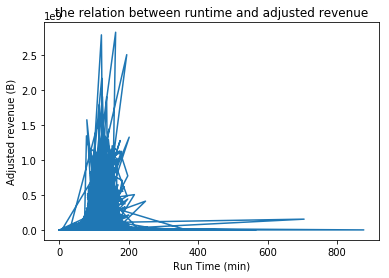

In [17]:
x = movies["runtime"]
y = movies["revenue_adj"]
plt.plot(x, y,)
plt.title('the relation between runtime and adjusted revenue') 
plt.xlabel('Run Time (min)')
plt.ylabel('Adjusted revenue (B)')

> As we can see above here, the longer the movie is the less revenue it has. Ideally, movies that have the best revenue have a run time between 60 min to 200 min.

Text(0, 0.5, 'revenue (B)')

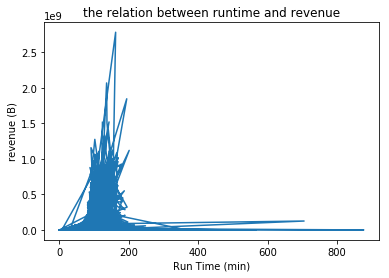

In [18]:
x = movies["runtime"]
y = movies["revenue"]
plt.plot(x, y,)
plt.title('the relation between runtime and revenue') 
plt.xlabel('Run Time (min)')
plt.ylabel('revenue (B)')

> As we can see above here, there is no much difference between the revenue and the adjusted revenue when it comes to the run time.

Text(0, 0.5, 'budget (M)')

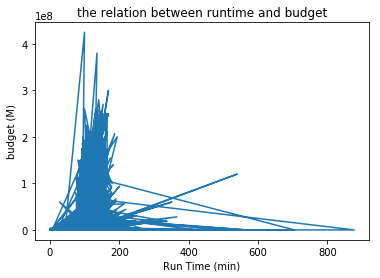

In [19]:
x = movies["runtime"]
y = movies["budget"]
plt.plot(x, y,)
plt.title('the relation between runtime and budget') 
plt.xlabel('Run Time (min)')
plt.ylabel('budget (M)')

> As we can see above here, the longer the movie is the less budget it has. however, there are some outliers.
>
>The reason for this is probably that the studio wants a shorter movie so that it can have more screening time per day. Which mean selling more tickets.

Text(0, 0.5, 'Adjusted budget (M)')

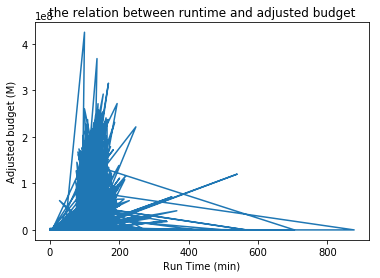

In [20]:
x = movies["runtime"]
y = movies["budget_adj"]
plt.plot(x, y,)
plt.title('the relation between runtime and adjusted budget') 
plt.xlabel('Run Time (min)')
plt.ylabel('Adjusted budget (M)')

> As we can see above here, there is no much difference between the budget and the adjusted budget when it comes to the run time.

Text(0, 0.5, 'popularity')

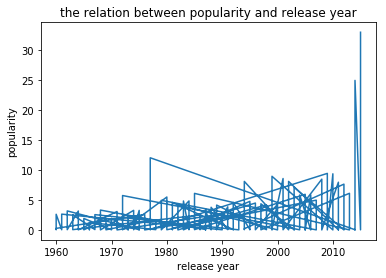

In [21]:
x = movies["release_year"]
y = movies["popularity"]
plt.plot(x, y,)
plt.title('the relation between popularity and release year') 
plt.xlabel('release year')
plt.ylabel('popularity')

> As we can see above here, newer movies are more popular than the old ones. Still, there are some popular old movies
>
> The popular old movies are probably classics


Text(0, 0.5, 'revenue (B)')

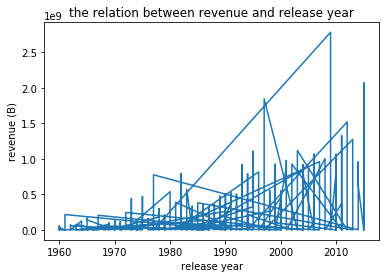

In [22]:
x = movies["release_year"]
y = movies["revenue"]
plt.plot(x, y,)
plt.title('the relation between revenue and release year') 
plt.xlabel('release year')
plt.ylabel('revenue (B)')

> As we can see above here, newer movies are making more revenue than the old ones.




Text(0, 0.5, 'adjusted revenue (B)')

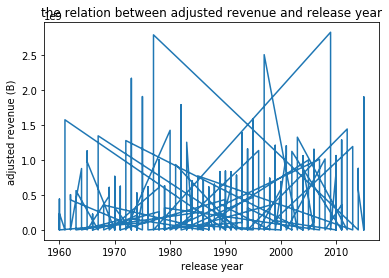

In [23]:
x = movies["release_year"]
y = movies["revenue_adj"]
plt.plot(x, y,)
plt.title('the relation between adjusted revenue and release year') 
plt.xlabel('release year')
plt.ylabel('adjusted revenue (B)')

> As we can see above here, when we take the adjusted revenue, we can see that there is no difference between the old movies and the new ones.
>
> This result can tell you that even old movies made a lot of money. As much as movies these days

Text(0, 0.5, 'budget (100M)')

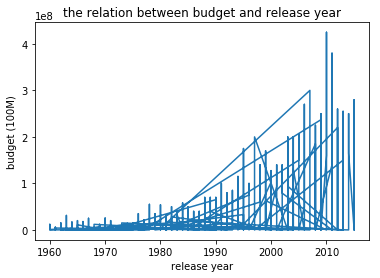

In [24]:
x = movies["release_year"]
y = movies["budget"]
plt.plot(x, y,)
plt.title('the relation between budget and release year') 
plt.xlabel('release year')
plt.ylabel('budget (100M)')

> From the graph above. Clearly, newer movies are costing so much more than older movies. 

Text(0, 0.5, 'budget (100M)')

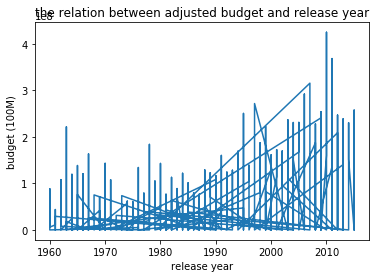

In [25]:
x = movies["release_year"]
y = movies["budget_adj"]
plt.plot(x, y,)
plt.title('the relation between adjusted budget and release year') 
plt.xlabel('release year')
plt.ylabel('budget (100M)')

> From the graph above. Newer movies are still costing more, but the gap is smaller now 

In [26]:
# check the highest Y for the attribute X in the data frame NewMoveisDataFrame, X in this case is runtime and Y is 10

NewMoveisDataFrame.nlargest(10, 'runtime')

,popularity,budget,revenue,original_title,director,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
4041,0.469332,0,0,Taken,Breck Eisner|FÃ©lix EnrÃ­quez AlcalÃ¡|John Faw...,877,38,6.8,2002,0.0,0.000000e+00
2722,0.537593,0,125000000,Band of Brothers,Phil Alden Robinson|Richard Loncraine|Mikael S...,705,313,8.0,2001,0.0,1.539360e+08
6176,0.147489,0,0,Shoah,Claude Lanzmann,566,16,8.3,1985,0.0,0.000000e+00
2214,0.757082,120000000,0,The Pacific,Jeremy Podeswa|Tim Van Patten|David Nutter|Gra...,540,183,7.8,2010,120000000.0,0.000000e+00
1865,0.102223,0,0,Life,Martha Holmes|Simon Blakeney|Stephen Lyle,500,24,7.0,2009,0.0,0.000000e+00
3141,0.336308,0,0,Generation Kill,Susanna White|Simon Cellan Jones,470,28,6.6,2008,0.0,0.000000e+00
2170,0.082894,0,0,The Pillars of the Earth,Sergio Mimica-Gezzan,421,22,7.3,2010,0.0,0.000000e+00
2843,0.114027,0,0,The Blue Planet,Alastair Fothergill,400,22,6.9,2001,0.0,0.000000e+00
6008,0.141918,0,0,Crystal Lake Memories: The Complete History of...,Daniel Farrands,400,10,6.9,2013,0.0,0.000000e+00
4788,0.179240,0,0,World Without End,Michael Caton-Jones,389,10,6.1,2012,0.0,0.000000e+00


> Those are the top 10 longest running movies.
>
> Taken is the longest with almost 14.5 hours
>

In [27]:
NewMoveisDataFrame.nlargest(10, 'popularity')

,popularity,budget,revenue,original_title,director,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,6185,7.1,2015,1.379999e+08,3.481613e+08
629,24.949134,165000000,621752480,Interstellar,Christopher Nolan,169,6498,8.0,2014,1.519800e+08,5.726906e+08
630,14.311205,170000000,773312399,Guardians of the Galaxy,James Gunn,121,5612,7.9,2014,1.565855e+08,7.122911e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,2480,6.3,2015,1.012000e+08,2.716190e+08
631,12.971027,170000000,714766572,Captain America: The Winter Soldier,Joe Russo|Anthony Russo,136,3848,7.6,2014,1.565855e+08,6.583651e+08
1329,12.037933,11000000,775398007,Star Wars,George Lucas,121,4428,7.9,1977,3.957559e+07,2.789712e+09
632,11.422751,20000000,78739897,John Wick,Chad Stahelski|David Leitch,101,2712,7.0,2014,1.842182e+07,7.252661e+07
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,5292,7.5,2015,1.839999e+08,1.902723e+09
633,10.739009,125000000,752100229,The Hunger Games: Mockingjay - Part 1,Francis Lawrence,123,3590,6.6,2014,1.151364e+08,6.927528e+08


> Those are the top 10 most popular movies.
>
> Jurassic World is the most popular
>
> All the movies in the top 10 except star wars were released in 2014 and 2015
>

In [28]:
NewMoveisDataFrame.nlargest(10, 'vote_count')

,popularity,budget,revenue,original_title,director,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
1919,9.363643,160000000,825500000,Inception,Christopher Nolan,148,9767,7.9,2010,1.600000e+08,8.255000e+08
4361,7.637767,220000000,1519557910,The Avengers,Joss Whedon,143,8903,7.3,2012,2.089437e+08,1.443191e+09
1386,9.432768,237000000,2781505847,Avatar,James Cameron,162,8458,7.1,2009,2.408869e+08,2.827124e+09
2875,8.466668,185000000,1001921825,The Dark Knight,Christopher Nolan,152,8432,8.1,2008,1.873655e+08,1.014733e+09
4364,5.944518,100000000,425368238,Django Unchained,Quentin Tarantino,165,7375,7.7,2012,9.497443e+07,4.039911e+08
4382,2.571099,75000000,691210692,The Hunger Games,Gary Ross,142,7080,6.7,2012,7.123082e+07,6.564734e+08
5425,4.946136,200000000,1215439994,Iron Man 3,Shane Black,130,6882,6.9,2013,1.872067e+08,1.137692e+09
4363,6.591277,250000000,1081041287,The Dark Knight Rises,Christopher Nolan,165,6723,7.5,2012,2.374361e+08,1.026713e+09
629,24.949134,165000000,621752480,Interstellar,Christopher Nolan,169,6498,8.0,2014,1.519800e+08,5.726906e+08
4367,4.218933,250000000,1017003568,The Hobbit: An Unexpected Journey,Peter Jackson,169,6417,6.9,2012,2.374361e+08,9.658933e+08


> Those are the top 10 movies with the highest vote count.
>
> Inception is the highest
>
> director Christopher Nolan has 4 movies on this list. He is the only director with more than one movie on this list.
>
> The year 2012 has 5 movies on this list.

In [29]:
NewMoveisDataFrame.nlargest(10, 'vote_average')

,popularity,budget,revenue,original_title,director,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
6911,0.212010,0,0,Pink Floyd: Pulse,David Mallet,145,23,8.7,2006,0.000000e+00,0.000000e+00
3690,0.321341,0,0,The Art of Flight,Curt Morgan,80,60,8.5,2011,0.000000e+00,0.000000e+00
8221,0.194889,0,0,A Personal Journey with Martin Scorsese Throug...,Martin Scorsese|Michael Henry Wilson,225,11,8.5,1995,0.000000e+00,0.000000e+00
8411,0.302908,0,0,Queen - Rock Montreal,Saul Swimmer,138,14,8.5,1981,0.000000e+00,0.000000e+00
609,0.033378,0,0,The Jinx: The Life and Deaths of Robert Durst,Andrew Jarecki,240,72,8.4,2015,0.000000e+00,0.000000e+00
4178,7.192039,25000000,28341469,The Shawshank Redemption,Frank Darabont,142,5754,8.4,1994,3.677779e+07,4.169346e+07
5986,0.054380,4000000,0,"Guten Tag, RamÃ³n",Jorge RamÃ­rez SuÃ¡rez,119,11,8.4,2013,3.744133e+06,0.000000e+00
7948,0.283191,1200000,4978922,Stop Making Sense,Jonathan Demme,88,23,8.4,1984,2.518850e+06,1.045097e+07
1322,0.004853,0,0,One Direction: Where We Are - The Concert,Paul Dugdale,106,32,8.3,2014,0.000000e+00,0.000000e+00
1864,0.103773,0,0,Iron Maiden: Flight 666,Sam Dunn|Scot McFadyen,112,28,8.3,2009,0.000000e+00,0.000000e+00


> Those are the top 10 movies with the highest vote average.
>
> Pink Floyd: Pulse	 is the highest
>
> 8 out of this 10 didn't make any revenue
>

In [30]:
NewMoveisDataFrame.nlargest(10, 'budget')

,popularity,budget,revenue,original_title,director,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,0.250540,425000000,11087569,The Warrior's Way,Sngmoo Lee,100,74,6.4,2010,4.250000e+08,1.108757e+07
3375,4.955130,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,Rob Marshall,136,3180,6.3,2011,3.683713e+08,9.904175e+08
7387,4.965391,300000000,961000000,Pirates of the Caribbean: At World's End,Gore Verbinski,169,2626,6.8,2007,3.155006e+08,1.010654e+09
14,5.944927,280000000,1405035767,Avengers: Age of Ultron,Joss Whedon,141,4304,7.4,2015,2.575999e+08,1.292632e+09
6570,1.957331,270000000,391081192,Superman Returns,Bryan Singer,154,834,5.3,2006,2.920507e+08,4.230205e+08
1929,2.865684,260000000,591794936,Tangled,Nathan Greno|Byron Howard,100,2019,7.3,2010,2.600000e+08,5.917949e+08
4411,1.588457,260000000,284139100,John Carter,Andrew Stanton,132,1479,6.0,2012,2.469335e+08,2.698595e+08
7394,2.520912,258000000,890871626,Spider-Man 3,Sam Raimi,139,2083,5.8,2007,2.713305e+08,9.369017e+08
5508,1.214510,255000000,89289910,The Lone Ranger,Gore Verbinski,149,1607,6.0,2013,2.386885e+08,8.357833e+07
634,10.174599,250000000,955119788,The Hobbit: The Battle of the Five Armies,Peter Jackson,144,3110,7.1,2014,2.302728e+08,8.797523e+08


> Those are the top 10 movies with the highest budget.
>
> The Warrior's Way is the highest
>
> All of these movies are made after the year 2005, and 7 of them are made after the year 2009
>

In [31]:
NewMoveisDataFrame.nlargest(10, 'revenue')

,popularity,budget,revenue,original_title,director,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,9.432768,237000000,2781505847,Avatar,James Cameron,162,8458,7.1,2009,2.408869e+08,2.827124e+09
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,5292,7.5,2015,1.839999e+08,1.902723e+09
5231,4.355219,200000000,1845034188,Titanic,James Cameron,194,4654,7.3,1997,2.716921e+08,2.506406e+09
4361,7.637767,220000000,1519557910,The Avengers,Joss Whedon,143,8903,7.3,2012,2.089437e+08,1.443191e+09
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,5562,6.5,2015,1.379999e+08,1.392446e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,2947,7.3,2015,1.747999e+08,1.385749e+09
14,5.944927,280000000,1405035767,Avengers: Age of Ultron,Joss Whedon,141,4304,7.4,2015,2.575999e+08,1.292632e+09
3374,5.711315,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,David Yates,130,3750,7.7,2011,1.211748e+08,1.287184e+09
5422,6.112766,150000000,1274219009,Frozen,Chris Buck|Jennifer Lee,102,3369,7.5,2013,1.404050e+08,1.192711e+09
5425,4.946136,200000000,1215439994,Iron Man 3,Shane Black,130,6882,6.9,2013,1.872067e+08,1.137692e+09


> Those are the top 10 movies with the highest revenue.
>
> Avatar is the highest
>
> directors James Cameron and Joss Whedon are the only two directors in this list with more than one movie.
>
> Other than Titanic, all these movies are made after the year 2008

In [32]:
# MoveisGenre is a data frame with 2 columns, one is for genre and the other is the number of movies of that genre in our dataset.
# NewMoveisDataFrameSplitGenres is the data frame with the split genre that we created previously.

MoveisGenre = (pd.DataFrame(NewMoveisDataFrameSplitGenres.groupby('genres').original_title.nunique()))
MoveisGenre.nlargest(10,'original_title')

,original_title
genres,
Drama,4289
Comedy,3397
Thriller,2682
Action,2192
Romance,1547
Horror,1470
Adventure,1359
Crime,1283
Science Fiction,1118


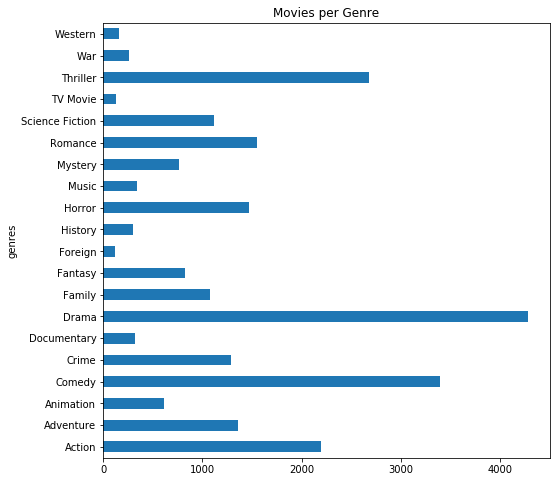

In [33]:
MoveisGenre['original_title'].plot.barh(title = 'Movies per Genre', figsize=(8, 8));

> Drama is the most popular genre in this dataset with 4289 movies

In [34]:
# MoveisReleaseYear is a data frame with 2 columns, one is for release year and the other is the number of movies of that year in our dataset.
# NewMoveisDataFrameSplitGenres is the data frame with the split genre that we created previously.

MoveisReleaseYear = (pd.DataFrame(NewMoveisDataFrameSplitGenres.groupby('release_year').original_title.nunique()))
MoveisReleaseYear.nlargest(10,'original_title')

,original_title
release_year,
2014,635
2013,566
2015,558
2012,498
2009,474
2011,456
2008,441
2010,420
2007,389


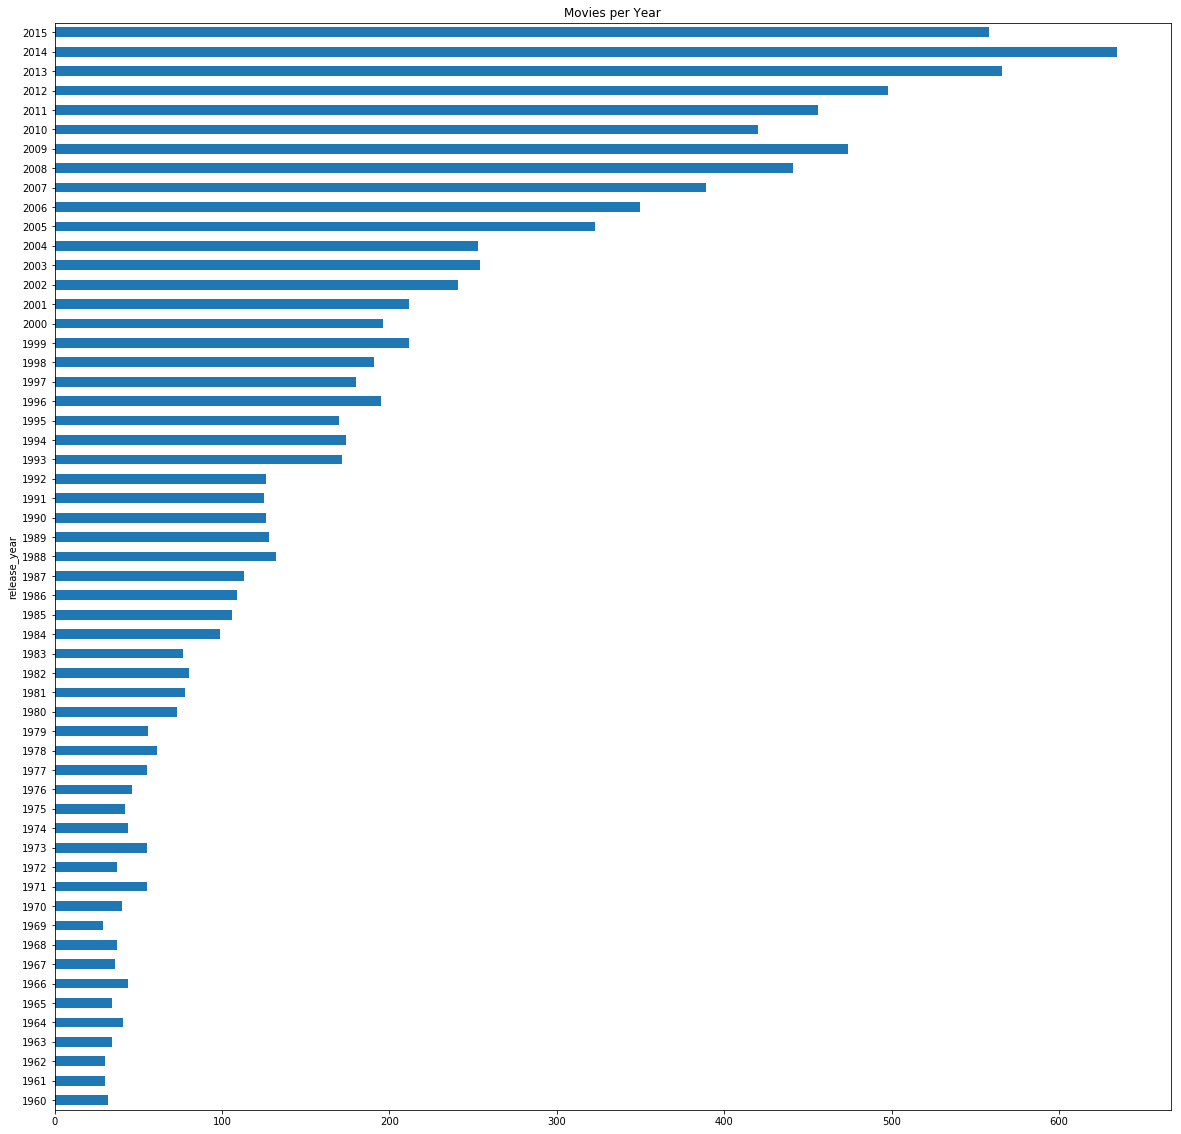

In [35]:
MoveisReleaseYear['original_title'].plot.barh(title = 'Movies per Year', figsize=(20, 20));

> The year 2014 has the highest number of movies in this dataset with 635 movies

In [36]:
# MoveisProductionCompanies is a data frame with 2 columns, one is for production companies and the other is the number of movies they have in our dataset.
# NewMoveisDataFrameSplitProductionCompanies is the data frame with the split production companies that we created previously.

MoveisProductionCompanies = (pd.DataFrame(NewMoveisDataFrameSplitProductionCompanies.groupby('production_companies').original_title.nunique()))
MoveisProductionCompanies.nlargest(10,'original_title')

,original_title
production_companies,
Universal Pictures,520
Warner Bros.,508
Paramount Pictures,428
Twentieth Century Fox Film Corporation,277
Columbia Pictures,271
New Line Cinema,217
Metro-Goldwyn-Mayer (MGM),216
Walt Disney Pictures,210
Touchstone Pictures,178


> Universal Pictures is the studio with the highest number of movies in this dataset

In [37]:
# MoveisCast is a data frame with 2 columns, one is for actor name and the other is the number of movies they have in our dataset.
# NewMoveisDataFrameSplitCast is the data frame with the splitcast that we created previously.

MoveisCast = (pd.DataFrame(NewMoveisDataFrameSplitCast.groupby('cast').original_title.nunique()))
MoveisCast.nlargest(10,'original_title')

,original_title
cast,
Robert De Niro,72
Samuel L. Jackson,70
Bruce Willis,62
Nicolas Cage,61
Michael Caine,51
Robin Williams,51
Morgan Freeman,49
John Cusack,48
John Goodman,48


> Actor Robert De Niro has the highest number of movies in this dataset

In [38]:
# MoveisDirector is a data frame with 2 columns, one is for director name and the other is the number of movies they have in our dataset.
# NewMoveisDataFrameSplitCast is the data frame with the splitcast that we created previously.

MoveisDirector = (pd.DataFrame(NewMoveisDataFrameSplitCast.groupby('director').original_title.nunique()))
MoveisDirector.nlargest(10,'original_title')

,original_title
director,
Woody Allen,42
Clint Eastwood,34
Steven Spielberg,29
Martin Scorsese,26
Ridley Scott,23
Ron Howard,22
Steven Soderbergh,22
Joel Schumacher,21
Brian De Palma,20


> director Woody Allen has the highest number of movies in this dataset

### Research Question 1 : Which genre cost the most and which genre made the most revenue?

> Now after this quick general investigation. Let's start to answer our questions.
>
> Our first question was Which genre cost the most and which genre made the most revenue?
>
> So let's start with that.
>
> We saw before that drama is the most popular genre. But is it the most profitable genre. We we'll see.
> 
> First we need to calculate the mean revenue and the mean budget for evrey genre.
>

In [39]:
# GenresMean is a new attribute that calculates the mean of NewMoveisDataFrameSplitGenres grouped by each genre.
# GenresMean is also a data frame.

# /1000000 to show numbers more clearly. For example instead of 1000000 you will see 1. This step is not necessary.

GenresMean = NewMoveisDataFrameSplitGenres.groupby(['genres']).mean()
GenresMean['revenue'] = GenresMean['revenue']/1000000
GenresMean['budget'] = GenresMean['budget']/1000000


> Now after calculating the mean we can present it as a chart
>

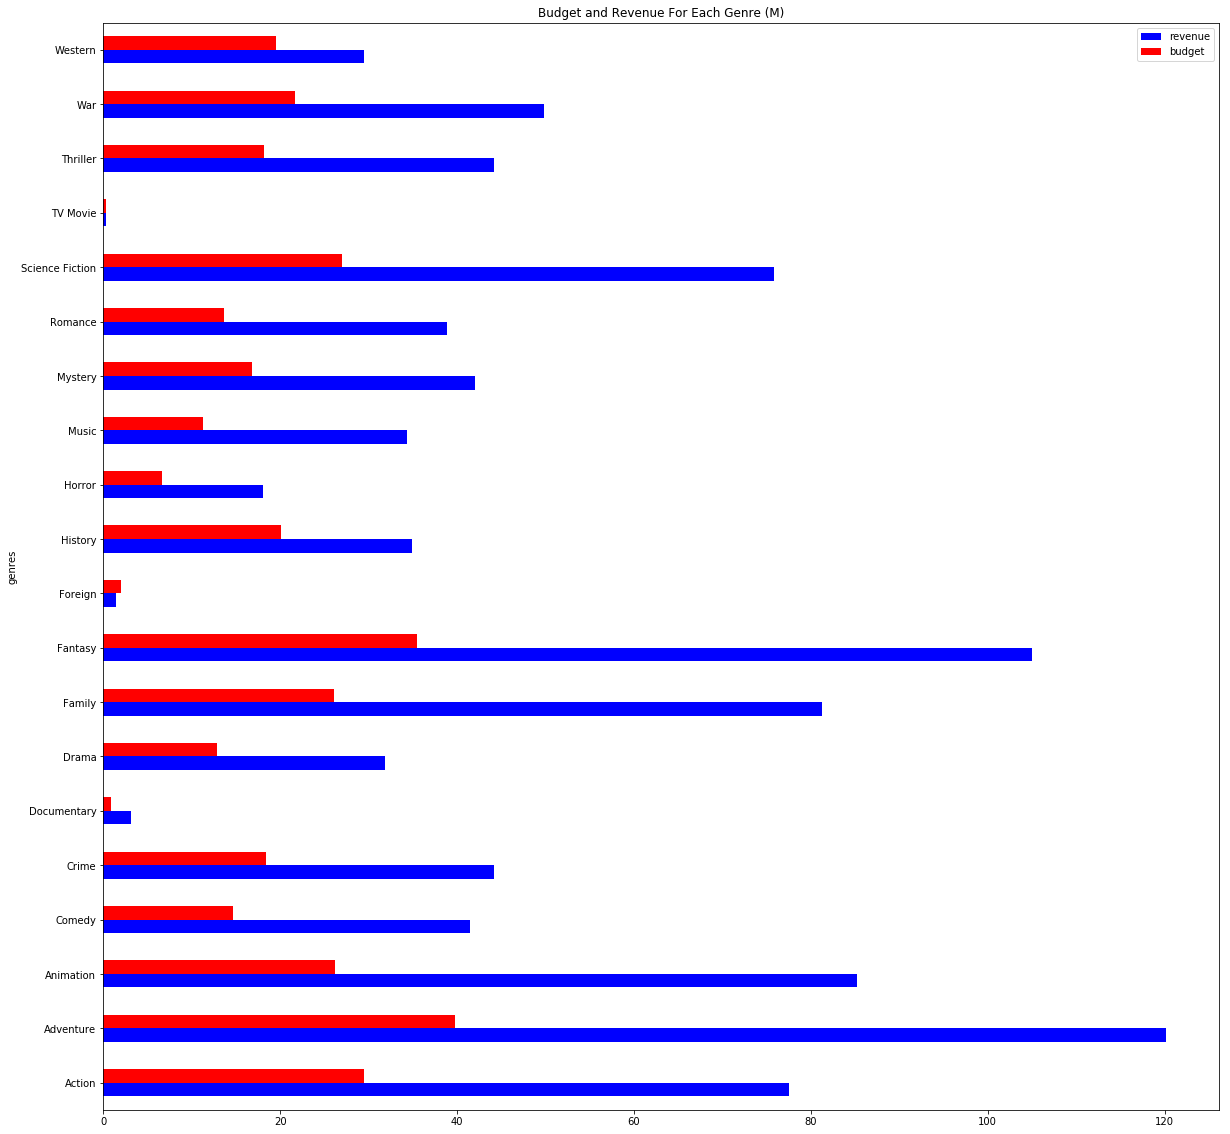

In [40]:
GenresMean[['revenue', 'budget']].plot.barh(stacked=False, title = 'Budget and Revenue For Each Genre (M)',color=('Blue','Red'), figsize=(20, 20));

> From the chart above. We can see that the adventure genre had the highest budget. However, it also had the highest revenue

### Research Question 2 : Is there any relation between the revenue and the release year?

> After we have answered the previous question. Let's look at the next question.
>
> Is there any relation between the revenue and the release year?
>
> To do that we need to calculate the mean revenue for every genre.
>
> So basically we are going to do the same previous step, but this time with years.

In [41]:
# YearMean is a new attribute that calculates the mean of NewMoveisDataFrameSplitGenres grouped by each year.
# YearMean is also a data frame.

YearMean = NewMoveisDataFrameSplitGenres.groupby('release_year').mean()

> Now after calculating the mean we can present it as a chart
>

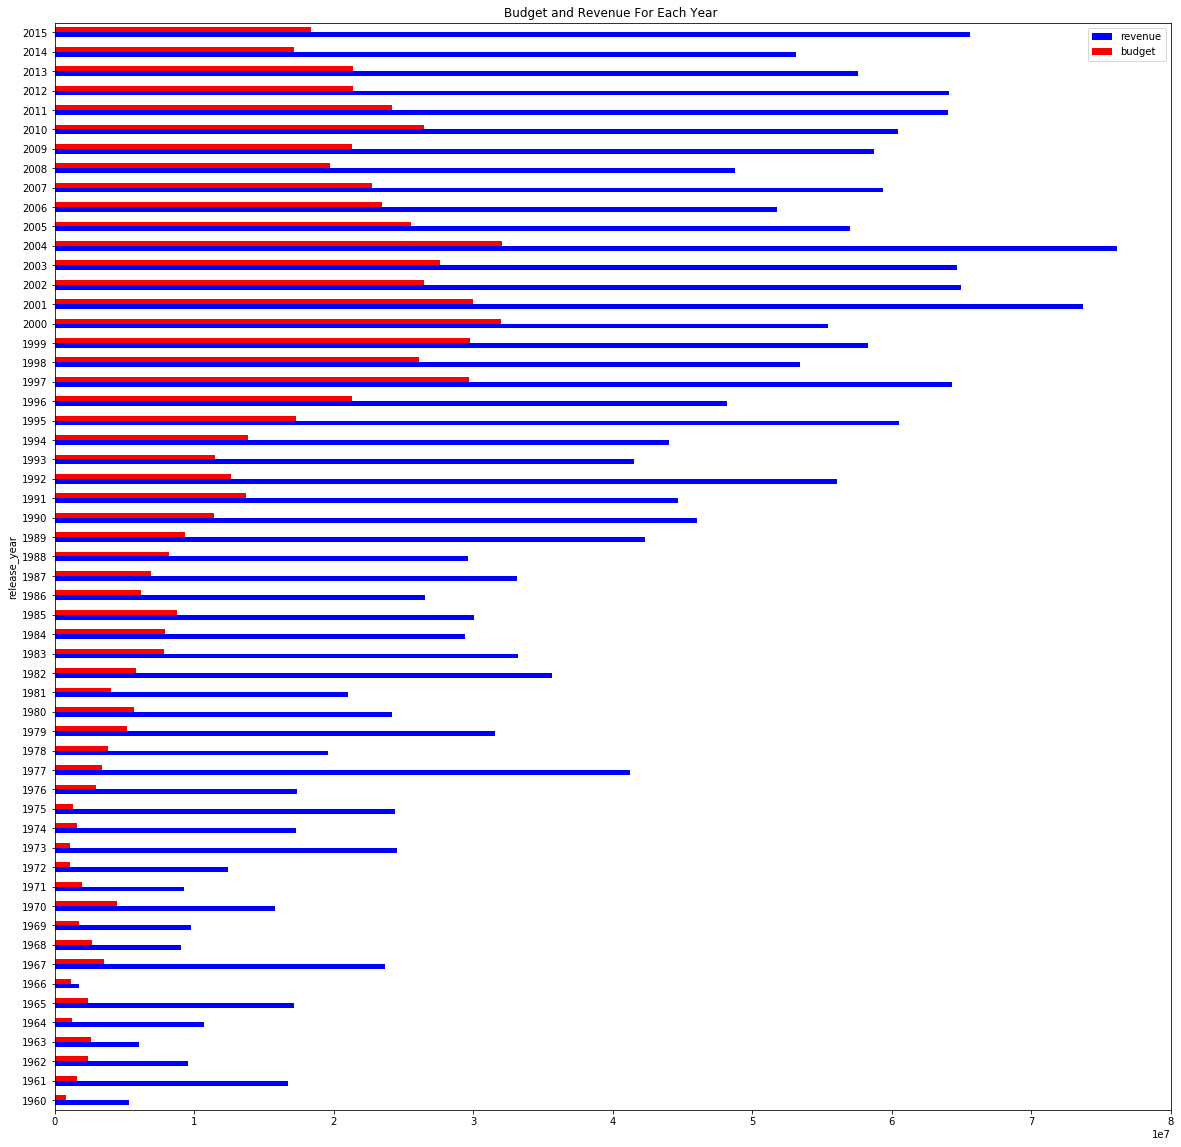

In [42]:
YearMean[['revenue', 'budget']].plot.barh(stacked=False, title = 'Budget and Revenue For Each Year ',color=('Blue','Red'), figsize=(20, 20));

> From the chart above. We can see that newer movies are costing more money, but also making a lot of money
>

### Research Question 2 : Is there any relation between the genre and the vote average?

> Now let's answer our last question.
>
> Is there any relation between the genre and the vote average?
>
> To do that we need to calculate the mean average vote for each genre. We already did this before, so let's draw the chart now
>
>

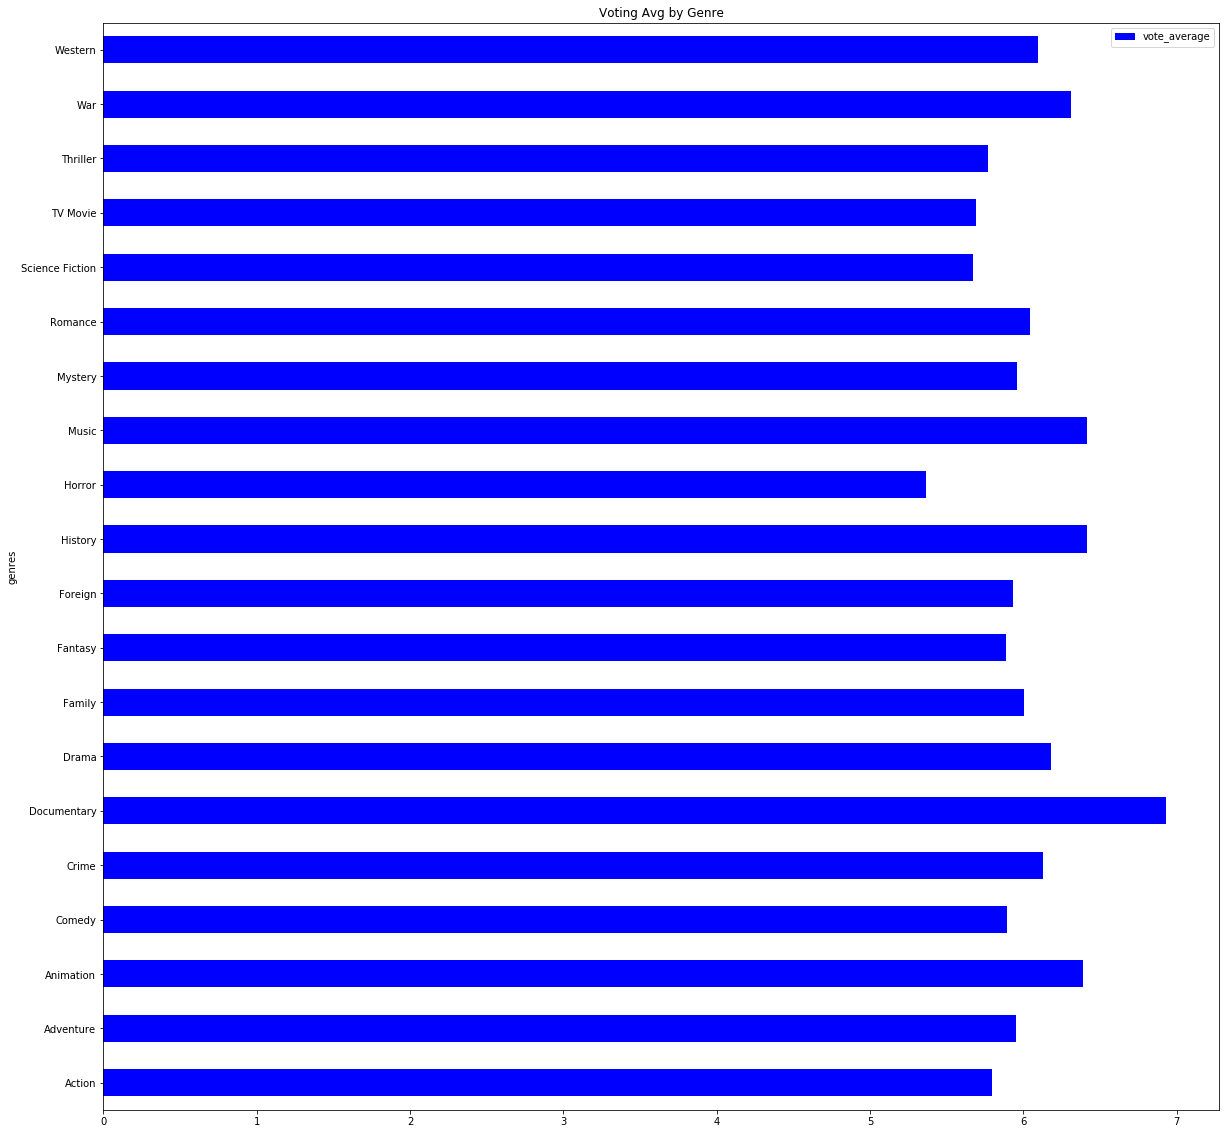

In [43]:
# average vote for every genre


GenresMean.sort_values('vote_average')

GenresMean[['vote_average']].plot.barh(stacked=True, title = 'Voting Avg by Genre',color='Blue', figsize=(20, 20));

> We can see from the graph above that documentary movies has the highest average.

<a id='conclusions'></a>
# Conclusions
>
>
>
  ## Limitations:
>
> First let's address some of the obstacles that we've had:
>
> 1- This data set has a lot of missing values. Which cause problems. One way to deal with this case is to replace the missing values with the mean. Another way is to drop the missing values. And since we have a big data set, dropping seems to be the best choice.
>
> 2- Some of the non-numerical attributes have multiple values for each entity(movie) such as (genre, cast, production companies). Which make that value unique, even though it's not. For example, if the genre of one movie is (Action, Drama), that is different than another movie with the genre (Drama, Action), and this is also different than a third movie with the genre(Action). So as you can see two of those movies should be in the category of drama, and 3 should be in the category of action. However, in this case, all three movies will have a unique genre. To solve this problem, those values need to be split. And it doesn't matter if we had a lot of redundancy, because this can be solved by taking a unique value (movie name, movie id).
>
>
>
  ##  Findings:
>
> In conclusions let's recap our findings.
> 
> 1- Movies that have the best revenue have a run time between 60 min to 200 min.
> 
> 2- Studios make sure that the movies with a high budget don't get a long run time.
> 
> 3- Newer movies are more popular than the old ones.
> 
> 4- Newer movies are making more revenue than the old ones. But with the adjusted revenue, there is no difference between the old movies and the new ones. Even old movies made a lot of money. As much as movies these days.
> 
> 5- Newer movies are costing so much more than older movies.
> 
> 6- The movie Taken has the longest run time with almost 14.5 hours.
> 
> 7- The movie Jurassic World is the most popular movie. All the movies in the top 10 popular movies except star wars were released in 2014 and 2015.
> 
> 8- The movie Inception has the highest vote count. And director Christopher Nolan has 4 movies on the top 10 highest vote count. He is the only director with more than one movie on this list. The year 2012 has 5 movies on this list.
> 
> 9- The movie Pink Floyd: Pulse has the highest average vote. 8 out of the top 10 didn't make any revenue
> 
> 10- The movie The Warrior's Way has the highest budget. All of the movies in the top 10 highest budget are made after the year 2005, and 7 of them are made after the year 2009
> 
> 11- The movie > Avatar has the highest revenue. And directors James Cameron and Joss Whedon are the only two directors in the top 10 highest revenue list with more than one movie. Other than Titanic, all of the movies are made after the year 2008
> 
> 12- Drama is the most popular genre in this dataset with 4289 movies
> 
> 13- The year 2014 has the highest number of movies in this dataset with 635 movies
> 
> 14- Universal Pictures is the studio with the highest number of movies in this dataset
> 
> 15- Actor Robert De Niro has the highest number of movies in this dataset
> 
> 16- Director Woody Allen has the highest number of movies in this dataset
> 
> 17- Adventure genre had the highest budget. However, it also had the highest revenue
> 
> 18-  newer movies are costing more money, but also making a lot of money (Like #5)
> 
> 19-  documentary movies have the highest average vote.
> 
>
>
>
> At the end. I hope that you will find everything clear.
